In [2]:
import pandas as pd
#import networkx as nx
import matplotlib.pyplot as plt
import hashlib
import csv
import config
%matplotlib inline

In [3]:
path_results = config.PATH_RESULTS
path_demographics = config.PATH_DEMOGRAPHICS
path_output = config.PATH_OUTPUT

## Wie zijn de deelnemers van dit experiment? (n=78)

In [8]:
users = pd.read_csv(path_demographics + 'antwoorden_yt_experiment.csv', sep=',', encoding = "ISO-8859-1")
#users['user_hash'] = [hashlib.md5(val).hexdigest() for val in users['mail'].str.encode('utf-8')]
#users.drop('mail', axis=1, inplace=True)

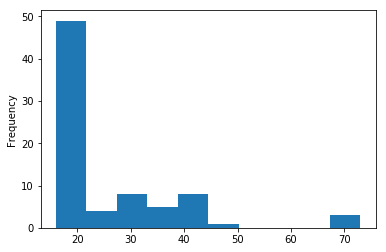

In [9]:
# verdeling leeftijd
users['leeftijd'].plot(kind='hist')

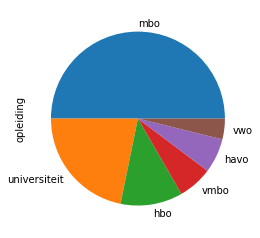

In [10]:
# verdeling opleiding
users['opleiding'].value_counts().plot(kind='pie')

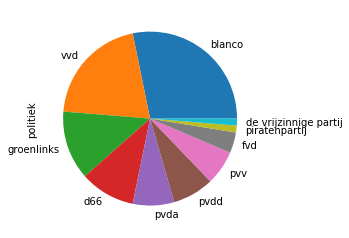

In [11]:
# politieke voorkeur
users['politiek'].value_counts().plot(kind='pie')

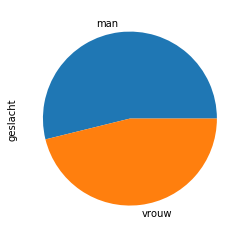

In [12]:
# geslacht
users['geslacht'].value_counts().plot(kind='pie')

## De aanbevelingen

Vragen:
1. Wat zijn de belangrijkste aanbevolen video's in totaal?
2. Wat zijn de belangrijkste aanbevolen kanalen in totaal?
3. Hoe moeten we die video's en kanalen politiek duiden?
4. Bovenstaande vragen, maar dan per zoekterm?
5. Zijn er verschillen in aanbevelingen tussen zoektermen? Wat verklaart die verschillen?
6. Wat zijn de verschillen in aanbevelingen per diepte (1,2,3, of 4)? 
7. In hoeverre komen de bekende rechtsextremistische en -radicale kanalen terug in deze lijst?
8. Hoe verschillen de aanbevelingen als we kijken naar leeftijd, opleiding, politieke voorkeur en geslacht van de deelnemers?

In [13]:
yt = pd.read_csv(path_output + 'yt_final.csv', low_memory=False)

In [14]:
yt.search_term.value_counts()

holocaust          364397
islam              358831
eurocrisis         346098
sylvana simons     342319
kajsa ollongren    341538
feminisme          332993
vluchtelingen      309768
geert wilders      308582
zwarte piet        306471
thierry baudet     292266
Name: search_term, dtype: int64

In [15]:
yt.columns

Index(['Unnamed: 0', 'from_video_id', 'from_video_title', 'from_channel_title',
       'depth', 'likes', 'dislikes', 'views', 'to_video_title', 'upload_date',
       'to_channel_id', 'to_channel_title', 'search_term', 'user_hash',
       'woonplaats', 'leeftijd', 'geslacht', 'opleiding', 'politiek'],
      dtype='object')

In [23]:
# meest populaire kanalen onder 25 jaar

onder25 = yt[yt['leeftijd'] < 25]
onder25 = onder25.to_channel_title.value_counts()
onder25.nlargest(30)

vpro zondag met lubach        61987
Omroep PowNed                 48767
Leukste YouTube fragmenten    38493
BuzzFeedVideo                 25276
Voetbal Inside                25006
RTL Late Night                20057
TEDx Talks                    12856
WatchMojo.com                 12059
Forum Democratie              11863
Tom Houben                    11178
GeenStijl                      9780
Cafe Weltschmerz               9660
TheLvkrijger                   9336
De Telegraaf                   8490
Vox                            7557
Kurzgesagt – In a Nutshell     7529
Kriss Papillon                 7447
CrashCourse                    6744
Keihard Producties             6275
RTL Z                          6094
RTL Nieuws                     6085
BuzzFeedBlue                   5540
PVVpers                        5452
Koetlife                       5380
Deweycheatumnhowe              5011
Comedy Central NL              4682
Nieuwsuur                      4618
NOS Jeugdjournaal           

In [32]:
# meest populaire kanalen boven 25

boven25 = yt[yt['leeftijd'] > 25]
boven25 = boven25.to_channel_title.value_counts()
boven25.nlargest(30)

vpro zondag met lubach        56215
Leukste YouTube fragmenten    32024
Omroep PowNed                 29040
Voetbal Inside                17558
RTL Late Night                17276
BuzzFeedVideo                 16395
TEDx Talks                    15402
Forum Democratie              14507
Rafiek de Bruin               12004
Tom Houben                    11152
Hanwe                         10672
De Telegraaf                   9638
NOS Jeugdjournaal              8650
TheLvkrijger                   7686
Vox                            7300
GeenStijl                      6861
Yad Vashem                     6069
WatchMojo.com                  5999
Deweycheatumnhowe              5901
Cafe Weltschmerz               5535
BRIGHT SIDE                    5329
Kurzgesagt – In a Nutshell     5010
RTL Nieuws                     4958
Keihard Producties             4629
RTL Z                          4349
PVVpers                        4153
NOS op 3                       4053
De Nieuwe Maan              

In [24]:
# meest populaire kanalen onder mbo

mbo = yt[yt['opleiding'] == 'mbo']
mbo = mbo.to_channel_title.value_counts()
mbo.nlargest(30)

vpro zondag met lubach        47908
Omroep PowNed                 40583
Leukste YouTube fragmenten    29594
BuzzFeedVideo                 20424
Voetbal Inside                19174
RTL Late Night                14210
WatchMojo.com                 10974
Tom Houben                     9017
Forum Democratie               8158
GeenStijl                      7773
Cafe Weltschmerz               7548
TheLvkrijger                   7363
Kriss Papillon                 7132
TEDx Talks                     6443
Vox                            6332
De Telegraaf                   6311
Kurzgesagt – In a Nutshell     6114
CrashCourse                    5814
Keihard Producties             5198
RTL Nieuws                     4664
RTL Z                          4527
BuzzFeedBlue                   4526
PVVpers                        4452
Comedy Central NL              4167
Deweycheatumnhowe              3834
Mr Whaatwaa                    3471
As/Is                          3408
Nieuwsuur                   

In [25]:
# meest populaire kanalen onder universiteit

wo = yt[yt['opleiding'] == 'universiteit']
wo = wo.to_channel_title.value_counts()
wo.nlargest(30)

vpro zondag met lubach        37056
Leukste YouTube fragmenten    21749
Omroep PowNed                 15352
RTL Late Night                12364
Voetbal Inside                11829
TEDx Talks                    10392
Forum Democratie               9946
BuzzFeedVideo                  8561
Hanwe                          8065
Tom Houben                     7823
Rafiek de Bruin                7623
De Telegraaf                   6697
NOS Jeugdjournaal              6057
TheLvkrijger                   5382
Vox                            4958
Deweycheatumnhowe              4249
GeenStijl                      4127
Yad Vashem                     3909
Cafe Weltschmerz               3732
BRIGHT SIDE                    3695
Kurzgesagt – In a Nutshell     3384
RTL Nieuws                     3377
Keihard Producties             3064
RTL Z                          2991
NOS op 3                       2943
PVVpers                        2774
WatchMojo.com                  2749
De Nieuwe Maan              

In [30]:
# meest populaire kanalen politiek rechts

rechts = yt[(yt['politiek'] == 'pvv') | (yt['politiek'] == 'vvd')| (yt['politiek'] == 'fvd')]
rechts = rechts.to_channel_title.value_counts()
rechts.nlargest(30)

vpro zondag met lubach        29430
Omroep PowNed                 20154
Leukste YouTube fragmenten    18192
BuzzFeedVideo                 12124
Voetbal Inside                10771
RTL Late Night                 9551
TEDx Talks                     8453
Forum Democratie               7063
Tom Houben                     5297
De Telegraaf                   4704
TheLvkrijger                   4685
GeenStijl                      4625
Cafe Weltschmerz               4263
WatchMojo.com                  4177
NOS Jeugdjournaal              3532
Vox                            3479
Rafiek de Bruin                3391
CrashCourse                    3117
Kurzgesagt – In a Nutshell     3062
RTL Nieuws                     2791
RTL Z                          2718
BuzzFeedBlue                   2715
Koetlife                       2705
Deweycheatumnhowe              2635
PVVpers                        2554
Keihard Producties             2399
Nieuwsuur                      2079
Kriss Papillon              

In [31]:
# meest populaire kanalen politiek links

links = yt[(yt['politiek'] == 'pvda') | (yt['politiek'] == 'groenlinks')| (yt['politiek'] == 'pvdd')]
links = links.to_channel_title.value_counts()
links.nlargest(30)

vpro zondag met lubach        35526
Leukste YouTube fragmenten    20230
Omroep PowNed                 16813
Voetbal Inside                12244
RTL Late Night                11861
BuzzFeedVideo                  9589
Forum Democratie               8351
TEDx Talks                     8129
Tom Houben                     6845
Rafiek de Bruin                6464
Hanwe                          6197
De Telegraaf                   5893
NOS Jeugdjournaal              5061
TheLvkrijger                   4836
Vox                            4478
GeenStijl                      4134
Kurzgesagt – In a Nutshell     3824
Deweycheatumnhowe              3751
Cafe Weltschmerz               3652
WatchMojo.com                  3610
RTL Nieuws                     3350
Yad Vashem                     3301
Keihard Producties             3296
RTL Z                          3087
BRIGHT SIDE                    2806
NOS op 3                       2735
PVVpers                        2545
De Nieuwe Maan              

## Enkele opvallende zaken m.b.t. de kanalen

### a. Opvallende kanalen
- PowNed
- Forum Democratie
- Cafe Weltschmerz
- Geenstijl
- TheLvKrijger (weinig volgers, behoorlijk rechts)
- Kriss Papillon (nog niet politiek kunnen plaatsen)
- Keihard Producties (weinig volgers, behoorlijk rechts)
- PVVPers
- Deweycheatumnhowe (weinig volgers, behoorlijk rechts)

### b. Geen grote verschillen tussen onder 25 en boven 25
### c. Geen grote verschillen tussen mbo en universiteit, ook niet t.o.v. leeftijd. De top is redelijk constant

In [21]:
# meest populaire video's onder 25 jaar

onder25 = yt[yt['leeftijd'] < 25]
onder25 = onder25.to_video_title.value_counts()
onder25.nlargest(30)

Thierry Baudet ligt in een deuk van het lachen, Kamervoorzitter Arib heeft slappe lach [6-3-2018]    2678
Thierry Baudet (FVD) sloopt Pechtold: "U bent bezig om de democratie af te schaffen" - APB17         2414
Saoedi-Arabië - Zondag met Lubach (S05)                                                              2213
Ouderen - Zondag met Lubach (S05)                                                                    2117
Kamer tegen plan Jesse Klaver voor debat over "Racist" Theo Hiddema                                  2090
Zeer sterk betoog door kwade Thierry Baudet (FVD) over afschaffen Referendum [20-2-2018]             1941
The Green Happiness - Zondag met Lubach (S05)                                                        1927
Hiddema vloert Grapperhaus over aanpakken haatimam                                                   1921
De lange arm van Turkije - Zondag met Lubach (S06)                                                   1754
Theo Hiddema (FVD) over Krakers in Amsterdam -

In [22]:
# meest populaire video's boven 25 jaar

boven25 = yt[yt['leeftijd'] > 25]
boven25 = boven25.to_video_title.value_counts()
boven25.nlargest(30)

Hiddema vloert Grapperhaus over aanpakken haatimam                                                   3894
Thierry Baudet ligt in een deuk van het lachen, Kamervoorzitter Arib heeft slappe lach [6-3-2018]    2730
Thierry Baudet (FVD) sloopt Pechtold: "U bent bezig om de democratie af te schaffen" - APB17         2487
Kamer tegen plan Jesse Klaver voor debat over "Racist" Theo Hiddema                                  2207
Ouderen - Zondag met Lubach (S05)                                                                    2126
Thierry Baudet vs. totale arrogantie van Klaas Dijkhoff (VVD) - APB17                                2083
Saoedi-Arabië - Zondag met Lubach (S05)                                                              1948
The Green Happiness - Zondag met Lubach (S05)                                                        1662
De Slimste Mens - Zondag met Lubach (S01)                                                            1594
Zeer sterk betoog door kwade Thierry Baudet (F

In [64]:
zoekterm = 'sylvana simons'
selectie = yt[yt['search_term'] == zoekterm]
selectie.to_csv(path_output + 'selectie_' + zoekterm + '.csv' )
selectie.to_video_title.value_counts()

COMPILATIE: Het allerbeste van 2017! - VOETBAL INSIDE                                                  1461
KUZU met Denk wordt hard aangekpakt door Jort Kelder!                                                  1223
Jan Jaap van der Wal over de partij Denk - RTL LATE NIGHT                                              1176
Henry van Loon - volledige Roast van Giel Beelen                                                       1100
René ligt he-le-maal dubbel om uitzending Jinek - VOETBAL INSIDE                                        992
Het Allerbeste van Jeroom 2017 - De Slimste Mens Ter wereld -  Best of Jeroom                           992
Hans Teeuwen doet Sylvana Simons                                                                        987
Zwarte Piet racistisch? - RTL LATE NIGHT                                                                978
Sylvana vs Sylvana                                                                                      974
COMPILATIE: Het allerbeste v

## 7. In hoeverre komen bekende rechtsradicale en -extremistische kanalen terug in de aanbevelingen?

Belangrijk: Om deze data op waarde te schatten, is het noodzakelijk te weten hoe de lijst met radicale en extremistische kanalen is samengesteld. Ik ben begonnen met een beperkte lijst van organisaties die in Kafka worden genoemd. Die heb ik aangevuld met organisaties op Wikipedia en uit academische literatuur. Vervolgens heb ik bij iedere organisatie in deze lijst de sociale media opgezocht, waaronder het YouTube-kanaal. Dat leverde ongeveer 170 hits op. Met behulp van de YTDT van het DMI heb ik gekeken op welke andere kanalen de gevonden kanalen geabonneerd zijn of welke ze 'featuren'. Daarom zie je ook kanalen als GeenStijl, Powned, etc. ertussen. De lijst moet nog goed gefilterd worden. De vraag is natuurlijk, waar filter je precies op? 

In [22]:
# laadt de lijst met rechtsradicale en -extremistische YT-kanalen

yt_right = pd.read_csv('/home/dim/Documents/projecten/extremisme/youtube/Data/infospheres/output/right/channels_right.csv')

In [25]:
yt_right = yt_right.rename(columns={'channel_id': 'to_channel_id'})

In [26]:
# voeg die samen met de aanbevelingen

right = pd.merge(yt, yt_right, on='to_channel_id', how='left')

In [28]:
# een sample van twintig kanalen

right = right.dropna()

In [32]:
right.columns

Index(['Unnamed: 0', 'from_video_id', 'from_video_title', 'from_channel_title',
       'depth', 'likes', 'dislikes', 'views', 'to_video_title', 'upload_date',
       'to_channel_id', 'to_channel_title', 'search_term', 'user_hash',
       'woonplaats', 'leeftijd', 'geslacht', 'opleiding', 'politiek',
       'channel_title', 'channel_description', 'channel_default_language',
       'channel_country', 'channel_uploads', 'channel_viewcount',
       'channel_commentcount', 'channel_subscribercount', 'channel_videocount',
       'channel_topic_ids', 'channel_topic_categories',
       'channel_branding_keywords'],
      dtype='object')

In [43]:
right.search_term.unique()

array(['feminisme', 'islam', 'kajsa ollongren', 'vluchtelingen',
       'thierry baudet', 'geert wilders', 'sylvana simons', 'eurocrisis',
       'zwarte piet', 'holocaust'], dtype=object)

In [60]:
selection = right[right['search_term'] == 'sylvana simons']

In [62]:
selection.to_video_title.value_counts()

Hiddema vloert Grapperhaus over aanpakken haatimam                                        549
Hiddema legt Grapperhaus uit hoe je liquidatiegeweld écht aan moet pakken                 196
Kamervoorzitter zet Microfoon Baudet uit                                                  165
Theo Hiddema (FVD) pakt Dijkhoff (VVD) aan over Poolse doodrijder                         127
Inbreng Geert Wilders Debat Regeringsverklaring 2017                                      119
Hiddema (FVD) vs Blok (VVD) over uitzetten asielzoekers                                   103
Yernaz Ramautarsing bij Pauw en Witteman (VARA) - 20131128                                 71
Baudet vs kartel over Syrië (volledige inbreng debat)                                      60
Hiddema pakt Grapperhaus aan tijdens debat over Justitie                                   52
Hiddema: Grapperhaus, pak de haatzaaiende imam aan!                                        48
Baudet vs Rutte (VVD) over de Dubbele Nationaliteit         

In [20]:
# ruim het bestand een beetje op
not_interesting = ["Omroep PowNed", 
                   "GeenStijl", 
                   "BuzzFeedVideo", 
                   "Brookings Institution", 
                   "Channel 4 News", 
                   "Evan Carmichael",
                   "The School of Life", 
                   "The Telegraph", 
                   "Comedy Central",
                    "Cafe Weltschmerz",
                   "RT"
                  
                  
                  ]
right_clean = right[~(right.Label.isin(not_interesting))]


In [21]:
right_clean.Label.value_counts()

Forum Democratie                 39664
PVVpers                          13413
PragerU                           7744
DENK TV                           5785
LaVieJanRoos                      3948
Acts17Apologetics                 3133
Stefan Molyneux                   3078
CNEWS                             2743
RobinHoodUKIP                     2648
Pegida Nederland                  1955
Rebel Media                       1088
Frederik Jan Roebersen             858
LP - Libertarische Partij          818
Black Pigeon Speaks                728
BFMTV                              715
Lindybeige                         666
De Dagelijkse Standaard DDS        624
UKIP MEPs                          553
Artikel 50                         540
De saneer-meneer                   489
REACT                              439
Sargon of Akkad                    423
misesmedia                         392
Real Crusades History              382
Christenen voor Israël             369
StevenCrowder            

In [45]:
# Giet deze resultaten in een netwerk

G=nx.from_pandas_dataframe(right_clean, 'from_channel_title', 'to_channel_title', ['search_term', 'depth', 'user_hash', 'views', 'politiek', 'opleiding', 'geslacht', 'leeftijd', 'woonplaats' ])
nx.write_gexf(G, "right_clean.gexf")

In [ ]:
right_clean.to_csv('')

In [ ]:
G=nx.from_pandas_dataframe(yt, 'from_channel_title', 'to_channel_title', ['search_term', 'depth', 'user_hash', 'views', 'politiek', 'opleiding', 'geslacht', 'leeftijd', 'woonplaats' ])
nx.write_gexf(G, "yt.gexf")